<a href="https://colab.research.google.com/github/JJungEEun/lotte_project/blob/jarae/%EB%B3%B4%EC%99%84_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#상품 군집분석을 위한 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
data2=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_02_PDDE.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)




---
#병합 (이 파트는 원데이터 통합한거 제출할 경우 빼도 될듯


data2(거래데이터)에 data4(상품명 데이터)를 병합합니다

In [5]:
data2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


In [6]:
#모든 행이 불러와졌는지 확인
len(data2)

4381743

In [7]:
data4=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_04_PD_CLAC.csv')

In [8]:
new_df=pd.read_csv('/content/drive/MyDrive/lotte/new_df.csv')

In [9]:
data2=pd.merge(data2,new_df,on='pd_c',how='left')

In [10]:
del data2['Unnamed: 0']

In [11]:
data2.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,l_pd,m_pd
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,L0048,M0298
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058


In [12]:
len(data2)

4381743



---



구매 횟수가 너무 많은 M057015266, M919374790의 행 제거

In [13]:
data2.cust.value_counts()[:5]

M057015266    12448
M919374790    10049
M287960590     2564
M763326819     2524
M124357021     2143
Name: cust, dtype: int64

In [14]:
df=data2[data2.cust!='M057015266']

In [15]:
df=data2[data2.cust!='M919374790']

In [16]:
len(df)

4371694



---



mroyal1~3 (로열층) 변수 추가

royal1: 구매도 많고, 평균 구매 금액도 큰 사람

royal2: 구매는 많고, 평균 구매 금액은 적은 사람

royal3: 구매는 많지 않지만 평균 구매 금액이 큰 사람

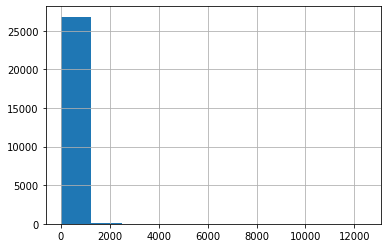

In [17]:
df.cust.value_counts().hist()

In [23]:
#구매 횟수 관련해, 상위 25% 이상인 214회 이상 구매자를 구매 횟수가 많은 것으로 판단
df.cust.value_counts().describe()

count    26916.000000
mean       162.419899
std        219.318656
min          1.000000
25%         30.000000
50%         88.000000
75%        214.000000
max      12448.000000
Name: cust, dtype: float64

In [21]:
#구매 금액 관련 기준은 평균 금액을 구한 후 결정
df.buy_am.describe()

count    4.371694e+06
mean     2.325773e+04
std      2.300716e+05
min      1.000000e+00
25%      2.000000e+03
50%      4.000000e+03
75%      9.300000e+03
max      6.400000e+07
Name: buy_am, dtype: float64

royal1~3 기준을 적용하기 위해 고객 데이터 프레임 생성

In [36]:
cust=df.cust.unique()
cust=pd.DataFrame(cust,columns=['cust'])

In [49]:
cust[:3]

,cust
0,M430112881
1,M646853852
2,M669384418


In [47]:
from collections import defaultdict
c_info=defaultdict()
for c in cust.cust:
  c_info[c]=[0,0]

In [80]:
for i in range(len(df)):
  c_info[df.iloc[i].cust][0]+=df.iloc[i].buy_am
  c_info[df.iloc[i].cust][1]+=1
  if i%500000==0:                     #진행도 확인용 (총 30분 소요)
    print(round(i/len(df),2)*100)

0.0
11.0
23.0
34.0
46.0
56.99999999999999
69.0
80.0
91.0


In [ ]:
m_cost=[]
m_buys=[]
for c in cust.cust:
  m_buys.append(c_info[c][1])
  m_cost.append(round(c_info[c][0]/c_info[c][1],2))

In [85]:
cust['m_cost']=m_cost
cust['m_buys']=m_buys

In [89]:
#평균 구매 금액의 평균이 약 3만원인데, 이는 평균 구매금액이 n백만원인 구매자들에 의해 끌어올려진 수치이므로 상위 25%의 금액을 고가품 구매자의 기준으로 정함
cust.m_cost.describe()

count    2.691600e+04
mean     3.079085e+04
std      7.432427e+04
min      7.461670e+03
25%      1.089684e+04
50%      1.442355e+04
75%      2.682743e+04
max      3.846250e+06
Name: m_cost, dtype: float64



---



In [110]:
def cost_royal_(x):
  if x>26827:
    return 1
  else:
    return 0

cust['cost_royal']=cust.m_cost.apply(cost_royal_)

In [111]:
def buys_royal_(x):
  if x>=214:
    return 1
  else:
    return 0

cust['buys_royal']=cust.m_buys.apply(buys_royal_)

In [112]:
cust

,cust,m_cost,m_buys,cost_royal,buys_royal
0,M430112881,7461.67,848,0,1
1,M646853852,20649.31,708,0,1
2,M669384418,17403.27,196,0,0
3,M886923095,19151.70,224,0,1
4,M707991383,54308.80,756,1,1
...,...,...,...,...,...
26911,M423644302,29300.00,2,1,0
26912,M316481461,116500.00,2,1,0
26913,M765148247,27000.00,2,1,0
26914,M498069014,57500.00,10,1,0


In [117]:
data1=pd.read_csv('/content/drive/MyDrive/lotte/LPOINT_BIG_COMP_01_DEMO.csv')

In [118]:
cust=pd.merge(cust,data1,on='cust',how='left')

In [124]:
cust

,cust,m_cost,m_buys,cost_royal,buys_royal,ma_fem_dv,ages,zon_hlv
0,M430112881,7461.67,848,0,1,1,50,Z17
1,M646853852,20649.31,708,0,1,1,40,Z13
2,M669384418,17403.27,196,0,0,1,50,Z17
3,M886923095,19151.70,224,0,1,1,40,Z17
4,M707991383,54308.80,756,1,1,1,50,Z16
...,...,...,...,...,...,...,...,...
26911,M423644302,29300.00,2,1,0,1,20,Z02
26912,M316481461,116500.00,2,1,0,1,30,Z10
26913,M765148247,27000.00,2,1,0,0,40,Z04
26914,M498069014,57500.00,10,1,0,1,40,Z14


In [121]:
#성별 인코딩: 여1, 남0을 사용합니다
cust['ma_fem_dv']=cust.ma_fem_dv.apply(lambda x: 1 if x=='여성' else 0)

In [123]:
#연령: 연령대의 대표값으로 나타내기 위해, 연령대+ 5를 사용합니다
cust['ages']=cust.ages.apply(lambda x: int(x[:-1])+5)

In [126]:
cust

,cust,m_cost,m_buys,cost_royal,buys_royal,ma_fem_dv,ages,zon_hlv
0,M430112881,7461.67,848,0,1,1,55,Z17
1,M646853852,20649.31,708,0,1,1,45,Z13
2,M669384418,17403.27,196,0,0,1,55,Z17
3,M886923095,19151.70,224,0,1,1,45,Z17
4,M707991383,54308.80,756,1,1,1,55,Z16
...,...,...,...,...,...,...,...,...
26911,M423644302,29300.00,2,1,0,1,25,Z02
26912,M316481461,116500.00,2,1,0,1,35,Z10
26913,M765148247,27000.00,2,1,0,0,45,Z04
26914,M498069014,57500.00,10,1,0,1,45,Z14


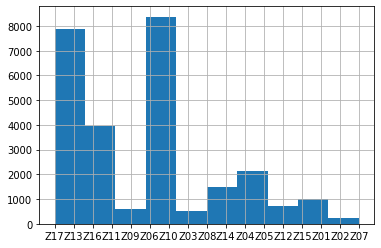

In [127]:
#시각화 결과, Z17과 Z10이 인구가 다수 분포하는 수도권일 것으로 예상되어 해당 지역 거주민을 1, 이외 지역 거주민을 0으로 인코딩 합니다
cust.zon_hlv.hist()

In [129]:
cust['zon_hlv']=cust.zon_hlv.apply(lambda x: 1 if x=='Z17' or x=='Z10' else 0)

In [130]:
cust

,cust,m_cost,m_buys,cost_royal,buys_royal,ma_fem_dv,ages,zon_hlv
0,M430112881,7461.67,848,0,1,1,55,1
1,M646853852,20649.31,708,0,1,1,45,0
2,M669384418,17403.27,196,0,0,1,55,1
3,M886923095,19151.70,224,0,1,1,45,1
4,M707991383,54308.80,756,1,1,1,55,0
...,...,...,...,...,...,...,...,...
26911,M423644302,29300.00,2,1,0,1,25,0
26912,M316481461,116500.00,2,1,0,1,35,1
26913,M765148247,27000.00,2,1,0,0,45,0
26914,M498069014,57500.00,10,1,0,1,45,0




---
고객 데이터 전처리가 완료됐습니다



#구매 데이터 전처리

각 거래 데이터(행) 별로, 

거래물품이 속한 중분류의 상대도수, 대분류의 상대도수, 대분류 내 중분류 상대도수 변수와

월 변수, 평일/주말 변수, 시간대의 분산 변수를 추가할 예정입니다

In [132]:
dl=df.l_pd.value_counts()
lsum=sum(df.l_pd.value_counts())

In [137]:
dl['L0008'] #dl은 각 대분류 상품명의 등장 횟수입니다

438483

In [134]:
l_p=[]
for p in df.l_pd:
  l_p.append(round(dl[p]/lsum,3))
l_p[:3]

[0.016, 0.014, 0.016]

In [138]:
df['l_p']=l_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


중분류 상대도수

In [141]:
dm=df.m_pd.value_counts()
msum=sum(df.m_pd.value_counts())

In [143]:
m_p=[]
for p in df.m_pd:
  m_p.append(round(dm[p]/msum,3))

In [148]:
df['m_p']=m_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


대분류 내 중분류 상대도수 

In [145]:
l_m_p=[]
for x,y in zip(df.l_pd,df.m_pd):
  l_m_p.append(round(dm[y]/dl[x],3))

In [146]:
#대분류, 중분류, 대분류내 중분류 상대도수 
for x,y,z in zip(l_p[:10],m_p[:10],l_m_p[:10]):
  print(x,y,z)

0.016 0.005 0.305
0.014 0.002 0.147
0.016 0.005 0.305
0.016 0.005 0.305
0.016 0.005 0.305
0.038 0.029 0.766
0.009 0.001 0.122
0.001 0.0 0.201
0.017 0.004 0.264
0.017 0.007 0.424


In [149]:
df['l_m_p']=l_m_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm,l_pd,m_pd,l_p,m_p,l_m_p
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,0.016,0.005,0.305
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,기타주방일회용품,주방잡화,주방일회용품,L0048,M0298,0.014,0.002,0.147
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,0.016,0.005,0.305
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,0.016,0.005,0.305
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,남성티셔츠,남성의류,남성의류상의,L0013,M0058,0.016,0.005,0.305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,0.003,0.003,0.948
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,0.003,0.003,0.948
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,0.003,0.003,0.948
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권,L0022,M0103,0.003,0.003,0.948


공휴일 변수를 추가합니다

In [172]:
#주말과 공휴일 변수. 첫 토요일은 1월 2일입니다
holi=[]
a,b='1','2'
end={'1':31,'2':28,'3':31,'4':30,'5':31,'6':30,'7':31,'8':31,'9':30,'10':31,'11':30,'12':31}

while True:

  if a=='12' and int(b)>end[a] or a=='13':
    break
  holi.append('2021'+str(a).zfill(2)+str(b).zfill(2))

  if int(b)+1>end[a]:
    a=str(int(a)+1)
    b='1'
    holi.append('2021'+str(a).zfill(2)+str(b).zfill(2))
  else:
    b=str(int(b)+1)
    holi.append('2021'+str(a).zfill(2)+str(b).zfill(2))
  
  #다음 토요일의 날짜로 변경
  if int(b)+6>end[a]:
    b=str(int(b)+6-end[a])
    a=str(int(a)+1)
  else:
    b=str(int(b)+6)

In [173]:
holi[-4:] 

['20211218', '20211219', '20211225', '20211226']

In [174]:
#주말이 아닌 공휴일 추가
holiday=['0101','0211','0212','0301','0505','0519','0816','0920','0921','0922','1004','1011']
for h in holiday:
  holi.append('2021'+h)

In [180]:
df['holi']=df.de_dt.apply(lambda x: 1 if str(x) in holi else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
#쉬는 날에 구매가 비교적 많이 발생합니다
df.holi.value_counts()

0    2745647
1    1626047
Name: holi, dtype: int64

월 변수

1부터 12까지 정수 라벨을 만들 경우, 1월과 12월 사이 간극이 과대평가 되는 문제가 발생합니다.

월변수는 기후와 계절성의 유사한 정도를 알기 위함이므로, 봄과 가을의 기후가 비교적 비슷하다는 점에 착안해 1월과 12월, 2월과 11월 같이 합이 13이 되는 월을 같은 라벨로 인코딩 할 것입니다

In [189]:
str(df.iloc[0].de_dt)[-4:-2]

'20210101'

In [191]:
def month(d):
  m=str(d)[-4:-2]
  if m=='01' or m=='12':
    return 0
  if m=='02' or m=='11':
    return 1
  if m=='03' or m=='10':
    return 2
  if m=='04' or m=='09':
    return 3
  if m=='05' or m=='08':
    return 4
  if m=='06' or m=='07':
    return 5

In [192]:
df['month']=df.de_dt.apply(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [194]:
#잘 나뉘었습니다
df.month.value_counts()

4    785318
0    748345
2    734860
5    729089
3    727445
1    646637
Name: month, dtype: int64



---



제휴사

In [195]:
df.cop_c.value_counts()

A02    2374968
A03     905691
A01     700350
A04     306354
A06      76160
A05       8171
Name: cop_c, dtype: int64

In [203]:
#제휴사에 따라 상품 성향이 다른 것 같습니다
df.groupby(['cop_c'])['clac_hlv_nm'].agg(pd.Series.mode)

cop_c
A01    테넌트/음식점
A02         채소
A03         채소
A04         음료
A05        컴퓨터
A06        상품권
Name: clac_hlv_nm, dtype: object

In [205]:
df[df['cop_c']=='A01'].clac_hlv_nm.value_counts()[:5]
#백화점 또는 쇼핑몰로 추측됨

테넌트/음식점    118284
여성의류        61681
남성의류        61618
스포츠패션       55184
패션잡화        41788
Name: clac_hlv_nm, dtype: int64

In [206]:
df[df['cop_c']=='A02'].clac_hlv_nm.value_counts()[:5]
#마트 또는 식료품점

채소      278231
과자      252569
대용식     190880
유제품     177938
냉장식품    167319
Name: clac_hlv_nm, dtype: int64

In [207]:
df[df['cop_c']=='A03'].clac_hlv_nm.value_counts()[:5]
#마트 또는 식료품점으로 추측

채소      131233
과자      102733
대용식      77184
유제품      76025
냉장식품     61153
Name: clac_hlv_nm, dtype: int64

In [208]:
df[df['cop_c']=='A04'].clac_hlv_nm.value_counts()[:5]
#편의점으로 추측

음료      59704
과자      44306
담배      36717
조리식품    24990
주류      22267
Name: clac_hlv_nm, dtype: int64

In [209]:
df[df['cop_c']=='A05'].clac_hlv_nm.value_counts()[:5]
#가전제품 매장으로 예상

컴퓨터        2380
생활/주방가전    1895
모바일        1407
계절가전        749
냉장/세탁가전     398
Name: clac_hlv_nm, dtype: int64

In [210]:
df[df['cop_c']=='A06'].clac_hlv_nm.value_counts()[:5]
#아울렛 또는 백화점 같습니다

상품권         12088
여성의류         5053
패션잡화         4611
화장품/뷰티케어     3391
유아동의류        3030
Name: clac_hlv_nm, dtype: int64

A01, A06이 유사하며 A02, A03이 유사합니다.

변수의 설명력을 유지하기 위해 정수 라벨링을 사용하지 않습니다

네가지 그룹에 대해 원 핫 인코딩을 적용합니다.

In [217]:
def A1(x): #쇼핑몰, 백화점
  if x=='A01' or x=='A06':
    return 1
  else:
    return 0

def A2(x): #식료품점, 대형마트
  if x=='A02' or x=='A03':
    return 1
  else:
    return 0

def A3(x): #편의점
  if x=='A04':
    return 1
  else:
    return 0

def A4(x): #가전제품 매장
  if x=='A05':
    return 1
  else:
    return 0

In [220]:
df['A1']=df.cop_c.apply(A1)
df['A2']=df.cop_c.apply(A2)
df['A3']=df.cop_c.apply(A3)
df['A4']=df.cop_c.apply(A4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [221]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,m_pd,l_p,m_p,l_m_p,holi,month,A1,A2,A3,A4
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,M0058,0.016,0.005,0.305,1,0,1,0,0,0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,M0298,0.014,0.002,0.147,1,0,1,0,0,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,0.016,0.005,0.305,1,0,1,0,0,0
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,0.016,0.005,0.305,1,0,1,0,0,0
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,M0058,0.016,0.005,0.305,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,0.003,0.003,0.948,0,0,1,0,0,0
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,0.003,0.003,0.948,0,0,1,0,0,0
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,0.003,0.003,0.948,0,0,1,0,0,0
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,M0103,0.003,0.003,0.948,0,0,1,0,0,0


In [241]:
cust.to_csv('cust.csv')

In [223]:
#한번 저장
df.to_csv('data2_pre.csv')

군집분석을 위한 메인 데이터가 준비되었습니다.

분류용 데이터를 만들기 위해 다시 가공이 필요합니다

In [242]:
df=pd.merge(df,cust, on='cust',how='left')

In [243]:
df

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,A2,A3,A4,m_cost,m_buys,cost_royal,buys_royal,ma_fem_dv,ages,zon_hlv
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,0,0,0,7461.67,848,0,1,1,55,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1,...,0,0,0,20649.31,708,0,1,1,45,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7461.67,848,0,1,1,55,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7461.67,848,0,1,1,55,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,0,0,0,7461.67,848,0,1,1,55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4371689,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,20040.72,520,0,1,0,45,1
4371690,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,20040.72,520,0,1,0,45,1
4371691,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,20040.72,520,0,1,0,45,1
4371692,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1,...,0,0,0,20040.72,520,0,1,0,45,1


In [244]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'l_p', 'm_p', 'l_m_p', 'holi', 'month', 'A1', 'A2', 'A3', 'A4',
       'm_cost', 'm_buys', 'cost_royal', 'buys_royal', 'ma_fem_dv', 'ages',
       'zon_hlv'],
      dtype='object')

In [245]:
data=pd.DataFrame(df.clac_mcls_nm.unique(), columns=['mcls_uniq'])

In [246]:
#관측 30회 미만인 중분류는 군집분석에 포함을 안할 수도 있습니다만, 일단 포함하겠습니다
df.m_pd.value_counts()[-20:].keys()

Index(['M0074', 'M0097', 'M0045', 'M0098', 'M0139', 'M0130', 'M0113', 'M0061',
       'M0187', 'M0046', 'M0271', 'M0328', 'M0164', 'M0225', 'M0219', 'M0231',
       'M0018', 'M0148', 'M0188', 'M0122'],
      dtype='object')

In [247]:
df.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_hlv_nm', 'clac_mcls_nm', 'l_pd',
       'm_pd', 'l_p', 'm_p', 'l_m_p', 'holi', 'month', 'A1', 'A2', 'A3', 'A4',
       'm_cost', 'm_buys', 'cost_royal', 'buys_royal', 'ma_fem_dv', 'ages',
       'zon_hlv'],
      dtype='object')

중분류 구매 이력이 있는 고객의 평균 거래금액의 평균 (고객 로열성) / 평균 거래횟수

In [249]:
buys=[]
cost=[]

for p in data.mcls_uniq:
  buys.append(df[df['clac_mcls_nm']==p].m_buys.mean().round(3))
  cost.append(df[df['clac_mcls_nm']==p].m_cost.mean().round(3))

In [250]:
data['buys']=buys
data['cost']=cost

성별, 연령

In [256]:
sex=[]
age=[]

for p in data.mcls_uniq:
  sex.append(df[df['clac_mcls_nm']==p].ma_fem_dv.mean().round(3))
  age.append(df[df['clac_mcls_nm']==p].ages.mean().round(3))

In [257]:
data['sex']=sex
data['age']=age

중분류, 대분류, 대분류 내 중분류의 상대도수

In [258]:
p_l=[]
p_m=[]
p_lm=[]

#중분류의 경우 left join해도 되지만, 아래와 같은 코드를 사용해도 결과가 동일하므로
#코드를 통일합니다

for p in data.mcls_uniq:
  p_l.append(df[df['clac_mcls_nm']==p].l_p.mean().round(3))
  p_m.append(df[df['clac_mcls_nm']==p].m_p.mean().round(3))
  p_lm.append(df[df['clac_mcls_nm']==p].l_m_p.mean().round(3))

In [259]:
data['p_l']=p_l
data['p_m']=p_l
data['p_lm']=p_lm

휴일, 계절성, 수도권성

In [261]:
wk=[] #휴일
mth=[] #계절성
cpt=[] #수도권

for p in data.mcls_uniq:
  wk.append(df[df['clac_mcls_nm']==p].holi.mean().round(3))
  mth.append(df[df['clac_mcls_nm']==p].month.mean().round(3))
  cpt.append(df[df['clac_mcls_nm']==p].zon_hlv.mean().round(3))

In [262]:
data['wk']=wk
data['mth']=mth
data['cpt']=cpt

제휴사

In [263]:
a1=[] #백화점, 쇼핑몰
a2=[] #식료품점
a3=[] #편의점
a4=[] #가전

for p in data.mcls_uniq:
  a1.append(df[df['clac_mcls_nm']==p].A1.mean().round(3))
  a2.append(df[df['clac_mcls_nm']==p].A2.mean().round(3))
  a3.append(df[df['clac_mcls_nm']==p].A3.mean().round(3))
  a4.append(df[df['clac_mcls_nm']==p].A4.mean().round(3))

In [264]:
data['a1']=a1
data['a2']=a2
data['a3']=a3
data['a4']=a4



---



In [267]:
data.head()

,mcls_uniq,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4
0,남성의류상의,500.752,38308.818,0.713,45.128,0.016,0.016,0.305,0.534,2.626,0.521,0.886,0.114,0.000,0.0
1,주방일회용품,917.234,16281.037,0.680,43.837,0.014,0.014,0.147,0.368,2.625,0.444,0.097,0.825,0.078,0.0
2,식당,627.593,29549.337,0.739,44.129,0.038,0.038,0.766,0.413,2.530,0.576,0.683,0.317,0.000,0.0
3,남성양말류,762.139,21743.302,0.720,47.688,0.009,0.009,0.122,0.406,2.511,0.435,0.207,0.779,0.014,0.0
4,기타구기/필드스포츠,596.521,22201.327,0.730,44.445,0.001,0.001,0.201,0.536,2.884,0.479,0.408,0.592,0.000,0.0


추가 전처리

In [265]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns

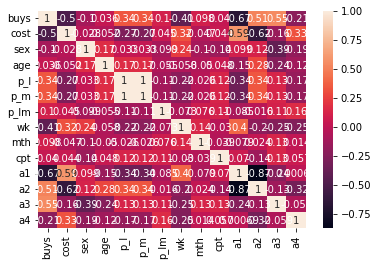

In [266]:
correl=data.corr()
sns.heatmap(correl,annot=True)

In [269]:
data.columns

Index(['mcls_uniq', 'buys', 'cost', 'sex', 'age', 'p_l', 'p_m', 'p_lm', 'wk',
       'mth', 'cpt', 'a1', 'a2', 'a3', 'a4'],
      dtype='object')

In [270]:
features = ['buys', 'cost', 'sex', 'age', 'p_l', 'p_m', 'p_lm', 'wk','mth', 'cpt', 'a1', 'a2', 'a3', 'a4']
# 사용데이터와 분류 대상을 분리
x = data.loc[:, features].values
y = data.loc[:,['mcls_uniq']].values

#양적 변수 스케일 조정
x1 = MinMaxScaler().fit_transform(x)
x2=StandardScaler().fit_transform(x)

#PCA

In [271]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2)
pc1 = pca1.fit_transform(x1)
pcdf1 = pd.DataFrame(data = pc1
             , columns = ['pc1', 'pc2'])

In [272]:
pca2 = PCA(n_components=2)
pc2 = pca2.fit_transform(x2)
pcdf2 = pd.DataFrame(data = pc2
             , columns = ['pc1', 'pc2'])

In [276]:
df1= pd.concat([pcdf1, data[['mcls_uniq']]], axis = 1)
df2= pd.concat([pcdf2, data[['mcls_uniq']]], axis = 1)

In [277]:
pcdf1

,pc1,pc2
0,-0.645065,0.170019
1,0.344888,-0.228787
2,-0.255073,0.281171
3,0.216608,-0.247042
4,-0.095126,-0.265000
...,...,...
344,-0.786900,0.203936
345,-0.911478,0.113730
346,-0.811164,0.085769
347,-0.843151,0.090907


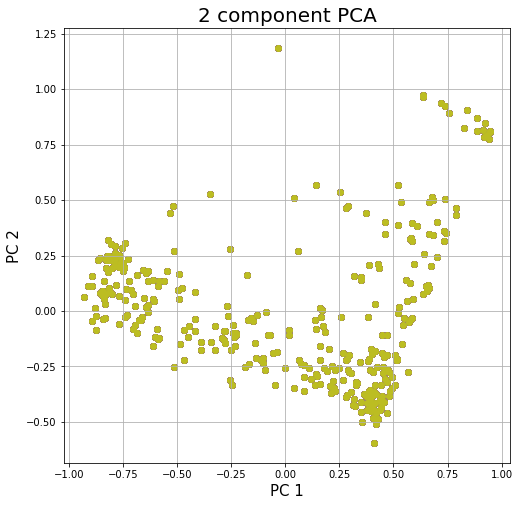

In [278]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target in data.mcls_uniq:
    ax.scatter(pcdf1.pc1,pcdf1.pc2)
ax.grid()

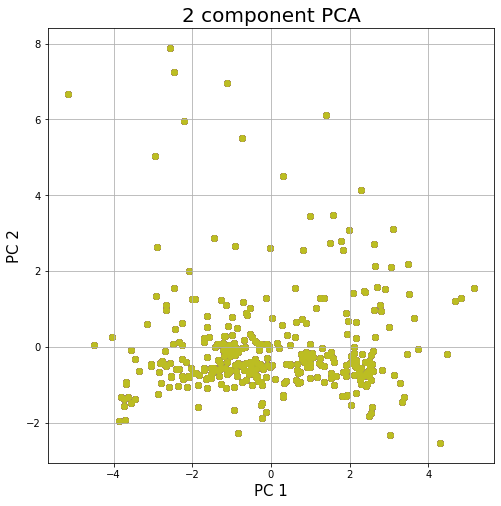

In [279]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target in data.mcls_uniq:
    ax.scatter(pcdf2.pc1,pcdf2.pc2)
ax.grid()

In [280]:
print("pc1 총분산: {1}, 분산: {0}".format(pca1.explained_variance_ratio_,round(sum(pca1.explained_variance_ratio_),3)))

pc1 총분산: 0.706, 분산: [0.5216032  0.18413514]


MinMaxScaler를 사용한 2요소 주성분 분석 결과가 훨씬 덜 랜덤한 분포를 보여주는데, 설명하는 총 분산이 70%로 조금 적은듯하여 3요소 주성분 분석을 사용하겠습니다

In [281]:
pca3 = PCA(n_components=3)
pc3 = pca3.fit_transform(x1)
pcdf3 = pd.DataFrame(data = pc3
             , columns = ['pc1', 'pc2','pc3'])

df3= pd.concat([pcdf3, data[['mcls_uniq']]], axis = 1)

In [284]:
print("pc3 총분산: {1}, 분산: {0}".format(pca3.explained_variance_ratio_,round(sum(pca3.explained_variance_ratio_),3)))

pc3 총분산: 0.798, 분산: [0.5216032  0.18413514 0.09212738]


3요소를 사용하면 총 분산 약 80%를 설명합니다

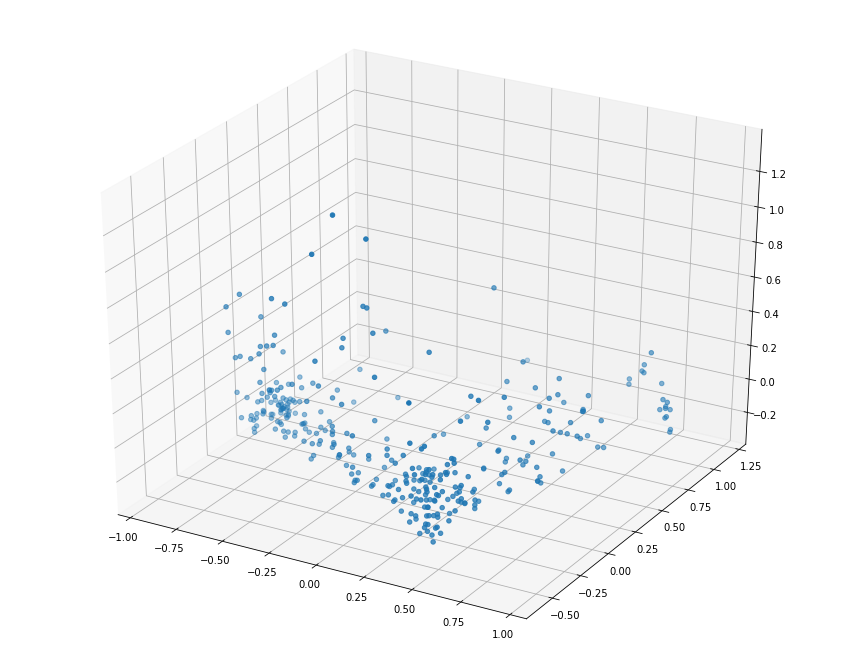

In [282]:
#3차원 시각화

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcdf3.pc1, pcdf3.pc2, pcdf3.pc3)
fig.set_size_inches(15,12)
plt.show()



---



#클러스터링


In [286]:
from sklearn.cluster import KMeans

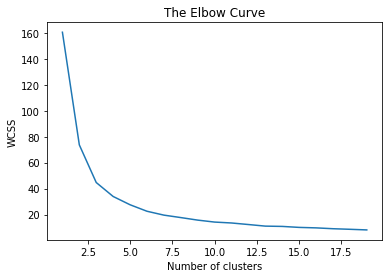

In [285]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(pcdf3)
 wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

최소 10개의 군집을 생성하는 것이 좋아보입니다.

In [287]:
kmeans1 = KMeans(n_clusters=10,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans1.fit(pcdf3)

KMeans(n_clusters=10, random_state=0)

In [288]:
kmeans2 = KMeans(n_clusters=15,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans2.fit(pcdf3)

KMeans(n_clusters=15, random_state=0)

In [289]:
data['clust10']=kmeans1.labels_
data['clust15']=kmeans2.labels_

In [291]:
data.clust10.value_counts()

3    77
7    50
6    47
1    44
0    33
9    28
5    26
8    19
4    17
2     8
Name: clust10, dtype: int64

In [292]:
data.clust15.value_counts()

10    55
5     34
12    31
7     27
4     25
1     25
2     24
3     23
14    23
13    22
11    19
6     17
8     13
9      8
0      3
Name: clust15, dtype: int64

In [300]:
for i in range(10):
  print(data[data['clust10']==i].mcls_uniq)

8       기타아웃도어/레저
10         남아의류상의
18         여아의류상의
28           피트니스
39        남아의류아우터
45             골프
60         수영/물놀이
71          스포츠댄스
94        카메라/캠코더
107            TV
108           청소기
109           세탁기
110       이용권/입장권
119    공기청정/가습/제습
128       모바일액세서리
130       컴퓨터/노트북
131         이미용가전
132          생활가전
142          기타가구
144        냉장/냉동고
152          주방가전
185         모바일기기
203        유아안전용품
211      여아특수소재의류
224            등산
245        여아의류세트
247        남아의류하의
266      남아특수목적의류
278           오디오
292        모바일상품권
307         렌탈서비스
309            낚시
316      DVD/홈시어터
Name: mcls_uniq, dtype: object
3           남성양말류
11             장갑
13           조리도구
48              떡
53           교육완구
68            홈웨어
69          여성양말류
72           냉장조리
79       액세서리편의용품
87           원두커피
97             잡곡
116          바디케어
118        핸드/풋케어
120          온장조리
124     일반문구/사무용품
137            원예
146          수예소품
147       여아의류아우터
158    카페트/러그/매트류
171    실외놀이/스포츠완구
179          미용

In [301]:
for i in range(15):
  print(data[data['clust15']==i].mcls_uniq)

35     생활서비스
337     일반담배
342       보험
Name: mcls_uniq, dtype: object
14         그릇/식기
23          성인침구
34       유아의류아우터
38            모자
50          조리기구
55          즉석반찬
58        유아의류상의
83          스킨케어
84          남성케어
92     사무용/학생용가구
106         여성속옷
136       남아의류세트
143         거실가구
151       건강보조식품
153    홍삼/인삼가공식품
162       건강관리용품
177      수유/이유용품
180        유아동속옷
188       여아의류하의
192         장식용품
261           벨트
267       우산/양산류
306           악기
313      스케이트/썰매
328       건강측정용품
Name: mcls_uniq, dtype: object
1         주방일회용품
51          간편조리
111         세탁세제
112         청소세제
135        잡화균일가
163           어류
165       여성위생용품
193         욕실용품
195          생선회
198          해초류
199    방향/제습/탈취제
206         주방세제
208         미술용품
213          조개류
216         구강케어
220         필기도구
256         면도용품
258          갑각류
260       특수위생용품
264          연체류
268       살충/방충제
277      세탁/건조용품
304      냉동포장생선류
324           노트
Name: mcls_uniq, dtype: object
25       차음료
26         빵
36      레

In [305]:
new_df=new_df[['clac_mcls_nm','m_pd']]

In [307]:
new_df.columns=['mcls_uniq','m_pd']

In [312]:
new_df=new_df[~new_df.duplicated()]

In [313]:
ex_data=pd.merge(data,new_df,on='mcls_uniq',how='left')

In [314]:
ex_data

,mcls_uniq,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4,clust10,clust15,m_pd
0,남성의류상의,500.752,38308.818,0.713,45.128,0.016,0.016,0.305,0.534,2.626,0.521,0.886,0.114,0.000,0.0,8,4,M0058
1,주방일회용품,917.234,16281.037,0.680,43.837,0.014,0.014,0.147,0.368,2.625,0.444,0.097,0.825,0.078,0.0,3,2,M0298
2,식당,627.593,29549.337,0.739,44.129,0.038,0.038,0.766,0.413,2.530,0.576,0.683,0.317,0.000,0.0,8,8,M0174
3,남성양말류,762.139,21743.302,0.720,47.688,0.009,0.009,0.122,0.406,2.511,0.435,0.207,0.779,0.014,0.0,1,12,M0057
4,기타구기/필드스포츠,596.521,22201.327,0.730,44.445,0.001,0.001,0.201,0.536,2.884,0.479,0.408,0.592,0.000,0.0,6,11,M0040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,소모품,259.000,25388.845,0.500,45.000,0.010,0.010,0.000,0.000,1.500,0.500,1.000,0.000,0.000,0.0,7,10,M0148
345,격투기,727.333,63732.680,0.333,41.667,0.001,0.001,0.001,0.667,2.333,1.000,1.000,0.000,0.000,0.0,7,10,M0018
346,오토바이,487.000,18976.980,0.000,50.000,0.002,0.002,0.001,0.167,3.667,0.500,1.000,0.000,0.000,0.0,7,10,M0225
347,임산부케어용품,429.143,17527.481,0.714,40.714,0.002,0.002,0.001,0.286,2.857,0.571,1.000,0.000,0.000,0.0,7,10,M0271


In [317]:
del ex_data['mcls_uniq']

In [319]:
ex_data.to_csv('cluster.csv')

In [303]:
data

,mcls_uniq,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4,clust10,clust15
0,남성의류상의,500.752,38308.818,0.713,45.128,0.016,0.016,0.305,0.534,2.626,0.521,0.886,0.114,0.000,0.0,8,4
1,주방일회용품,917.234,16281.037,0.680,43.837,0.014,0.014,0.147,0.368,2.625,0.444,0.097,0.825,0.078,0.0,3,2
2,식당,627.593,29549.337,0.739,44.129,0.038,0.038,0.766,0.413,2.530,0.576,0.683,0.317,0.000,0.0,8,8
3,남성양말류,762.139,21743.302,0.720,47.688,0.009,0.009,0.122,0.406,2.511,0.435,0.207,0.779,0.014,0.0,1,12
4,기타구기/필드스포츠,596.521,22201.327,0.730,44.445,0.001,0.001,0.201,0.536,2.884,0.479,0.408,0.592,0.000,0.0,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,소모품,259.000,25388.845,0.500,45.000,0.010,0.010,0.000,0.000,1.500,0.500,1.000,0.000,0.000,0.0,7,10
345,격투기,727.333,63732.680,0.333,41.667,0.001,0.001,0.001,0.667,2.333,1.000,1.000,0.000,0.000,0.0,7,10
346,오토바이,487.000,18976.980,0.000,50.000,0.002,0.002,0.001,0.167,3.667,0.500,1.000,0.000,0.000,0.0,7,10
347,임산부케어용품,429.143,17527.481,0.714,40.714,0.002,0.002,0.001,0.286,2.857,0.571,1.000,0.000,0.000,0.0,7,10




---



#군집분석 해석용

In [293]:
data.groupby(["clust10"]).mean()

,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4,clust15
clust10,,,,,,,,,,,,,,,
0,484.309000,59492.844879,0.664848,43.587667,0.002061,0.002061,0.290000,0.466485,2.548091,0.524939,0.780455,0.063485,0.003788,0.152242,10.636364
1,788.263750,21559.394636,0.719545,45.049227,0.009159,0.009159,0.137318,0.396750,2.361159,0.499636,0.234955,0.724318,0.032159,0.008614,11.454545
2,858.011125,24906.661875,0.626625,44.018625,0.059625,0.059625,0.041375,0.385375,2.510625,0.581750,0.332125,0.439625,0.228125,0.000000,9.000000
3,899.889195,16546.598182,0.713325,45.424714,0.008247,0.008247,0.206494,0.398532,2.587532,0.494610,0.054182,0.933675,0.011481,0.000740,6.662338
4,1043.055706,15796.743294,0.724294,45.914000,0.098588,0.098588,0.117588,0.356824,2.489412,0.546588,0.063118,0.870412,0.066471,0.000000,6.000000
5,974.455000,15450.744962,0.706115,45.612038,0.062000,0.062000,0.179923,0.353000,2.528308,0.553923,0.060769,0.848692,0.090500,0.000000,3.461538
6,780.199000,31596.045553,0.698170,44.226957,0.005191,0.005191,0.228574,0.373851,2.537638,0.540511,0.429787,0.330404,0.132043,0.107766,4.382979
7,503.367360,51886.875820,0.726920,44.382160,0.010420,0.010420,0.080380,0.459860,2.466200,0.554580,0.977860,0.020300,0.000300,0.001540,10.000000
8,571.650684,39230.141789,0.741105,45.146368,0.019263,0.019263,0.139211,0.443053,2.510316,0.555474,0.811211,0.187053,0.001368,0.000263,4.210526


In [294]:
data.groupby(["clust10"]).mean().mean(axis=0)

buys         782.095107
cost       29280.359513
sex            0.703059
age           44.932811
p_l            0.031138
p_m            0.031138
p_lm           0.156636
wk             0.400362
mth            2.505414
cpt            0.541280
a1             0.381942
a2             0.530604
a3             0.060298
a4             0.027142
clust15        7.295115
dtype: float64

In [295]:
data.groupby(["clust15"]).mean()

,buys,cost,sex,age,p_l,p_m,p_lm,wk,mth,cpt,a1,a2,a3,a4,clust10
clust15,,,,,,,,,,,,,,,
0,1624.789333,21529.302667,0.610667,42.299000,0.003667,0.003667,0.956333,0.178333,2.446333,0.753000,0.020333,0.029333,0.616667,0.333333,6.000000
1,651.143040,34093.540480,0.755640,45.146200,0.006160,0.006160,0.156040,0.413840,2.443080,0.537600,0.576840,0.398560,0.017280,0.007320,6.000000
2,918.593333,15950.450125,0.725375,46.731250,0.016500,0.016500,0.110833,0.376083,2.533333,0.519250,0.061833,0.915458,0.022250,0.000500,3.500000
3,989.290087,15282.097826,0.702087,45.292304,0.063174,0.063174,0.197870,0.352739,2.546565,0.552696,0.056652,0.843130,0.100174,0.000000,5.000000
4,555.186360,36934.212320,0.732160,44.608880,0.014800,0.014800,0.093240,0.475040,2.542240,0.554920,0.824720,0.173680,0.001040,0.000480,6.040000
5,872.014265,16574.032559,0.715265,44.967118,0.003647,0.003647,0.085176,0.418294,2.669559,0.458676,0.053912,0.941941,0.003412,0.000794,2.941176
6,1043.055706,15796.743294,0.724294,45.914000,0.098588,0.098588,0.117588,0.356824,2.489412,0.546588,0.063118,0.870412,0.066471,0.000000,4.000000
7,907.555593,16351.740222,0.713259,46.242815,0.040148,0.040148,0.115704,0.367852,2.480667,0.568185,0.079148,0.892741,0.028148,0.000000,8.555556
8,958.952077,29887.229231,0.581615,42.700000,0.008000,0.008000,0.412538,0.297000,2.816692,0.561615,0.215154,0.174769,0.359769,0.250385,5.384615


In [296]:
data.groupby(["clust15"]).mean().mean(axis=0)

buys         852.293763
cost       27425.864913
sex            0.694274
age           44.714340
p_l            0.023518
p_m            0.023518
p_lm           0.232662
wk             0.381278
mth            2.516056
cpt            0.548669
a1             0.306832
a2             0.536215
a3             0.099920
a4             0.057017
clust10        4.265422
dtype: float64